In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam.csv


In [6]:
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)



1.   **Data Cleaning**
2.   **EDA**
3.   **Text** **Preprocessing**
4.   **Model** **building**
5.   **Evaluation**
6.   **Improvement**
7.   **Website**
8.   **Deploy**



# **Data Cleaning**



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 Columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# rename the columns
df.rename(columns = {'v1':'Target','v2':'text'}, inplace = True)

In [18]:
df.sample(5)

,Target,text
5332,ham,I think steyn surely get one wicket:)
3386,ham,So u workin overtime nigpun?
4645,spam,We tried to contact you re your reply to our o...
321,ham,Hey... Why dont we just go watch x men and hav...
3050,ham,Awesome question with a cute answer: Someone a...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['Target'] = encoder.fit_transform(df['Target'])

In [22]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# missing values
df.isnull().sum()

Target    0
text      0
dtype: int64

In [24]:
# check for duplicate values
df.duplicated().sum()

403

In [26]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [27]:
df.duplicated().sum()

0

In [29]:
df.shape

(5169, 2)

# **EDA**


In [30]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

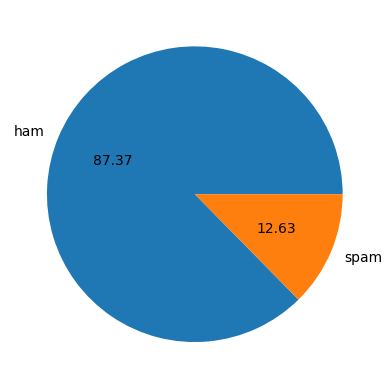

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

Data is imbalanced

In [33]:
import nltk

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
df['num_characters'] = df['text'].apply(len)

<ipython-input-38-f0cf0a313c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [43]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-43-7b1825ae98a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [44]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-44-d1d84e20b54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [45]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [52]:
# for ham messages
df[df['Target'] == 0].describe()

,Target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [53]:
# for spam messages
df[df['Target'] == 1].describe()

,Target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [54]:
import seaborn as sns

In [75]:
def histogram_plot(column_name):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['Target'] == 0][column_name], label='0', color='blue', kde=True)
    sns.histplot(df[df['Target'] == 1][column_name], label='1', color='red', kde=True)

    plt.legend(title=column_name)
    plt.show()


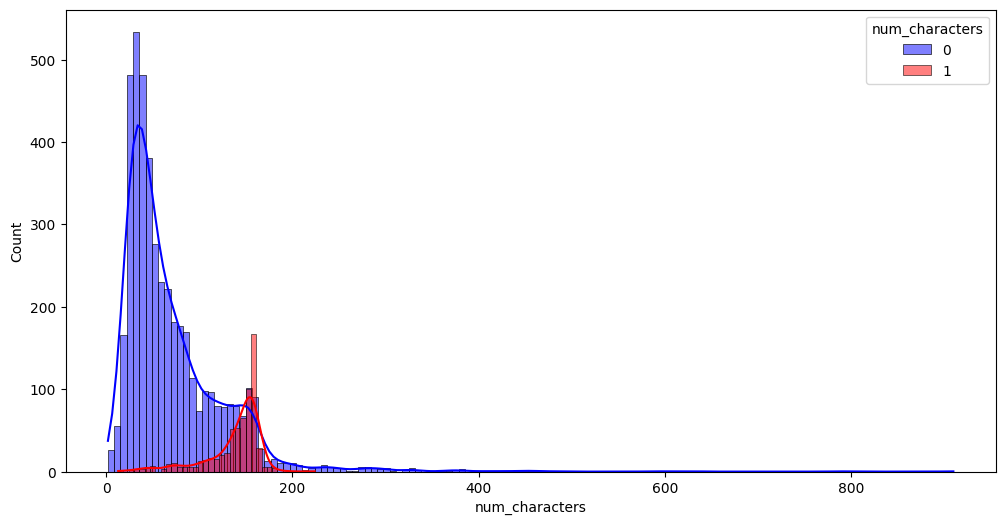

In [76]:
histogram_plot('num_characters')

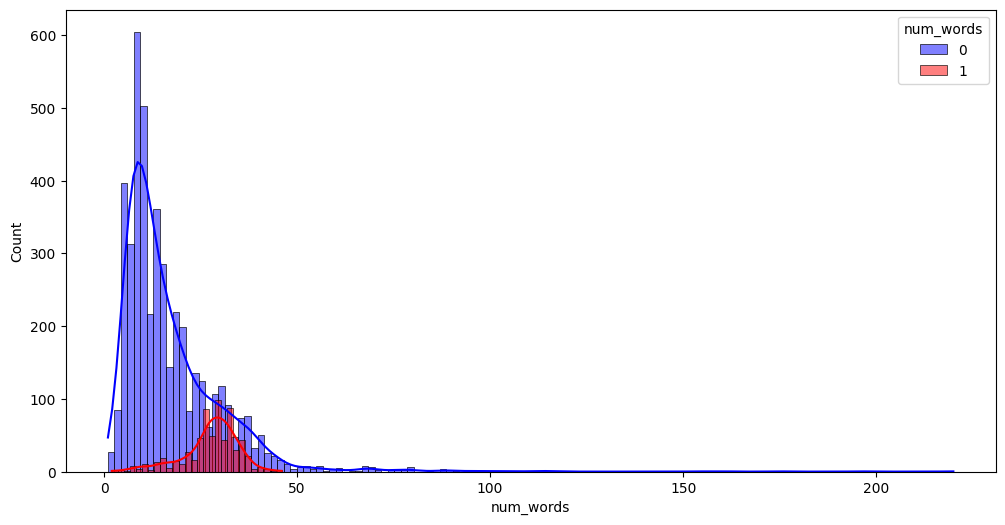

In [77]:
histogram_plot('num_words')

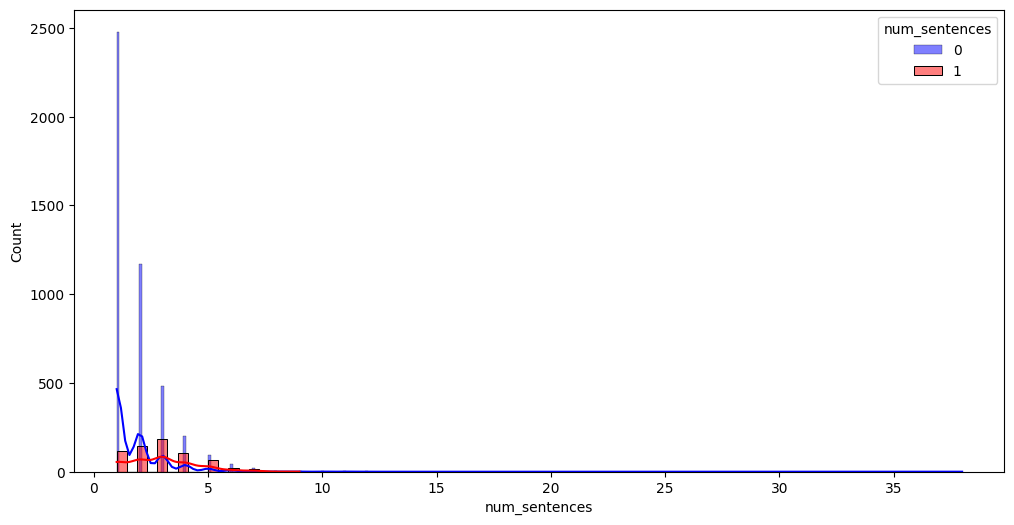

In [79]:
histogram_plot('num_sentences')

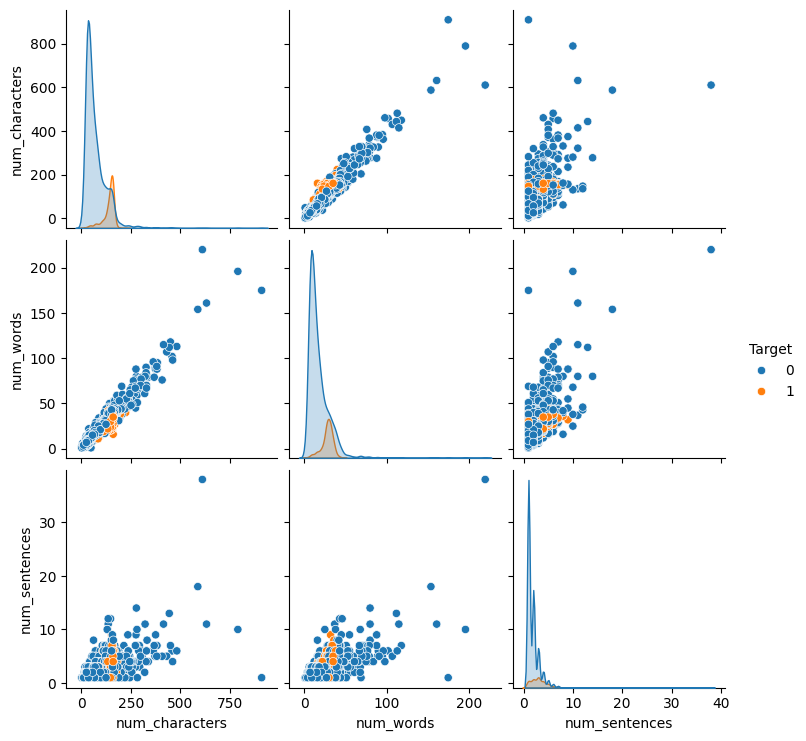

In [80]:
sns.pairplot(df,hue = 'Target')

<Axes: >

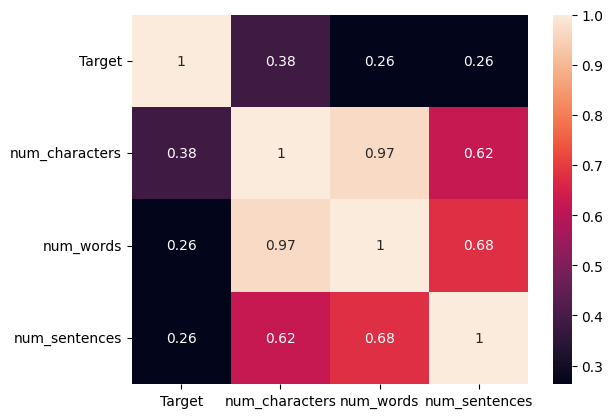

In [90]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [84]:
df.dtypes

Target             int64
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

# **Data Preprocessing**

1.   Lower Case
2.   Tokenization
3.   Removing special characters
4.   Removing stop words and punctuations
5.   Stemming



In [101]:
import string

In [100]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [112]:
def tranform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [113]:
tranform_text('Hi how are You !!!  chaitanya??')

'hi chaitanya'

In [115]:
df['transformed_text'] = df['text'].apply(tranform_text)

<ipython-input-115-736555415886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(tranform_text)


In [116]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [122]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white')

In [123]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))

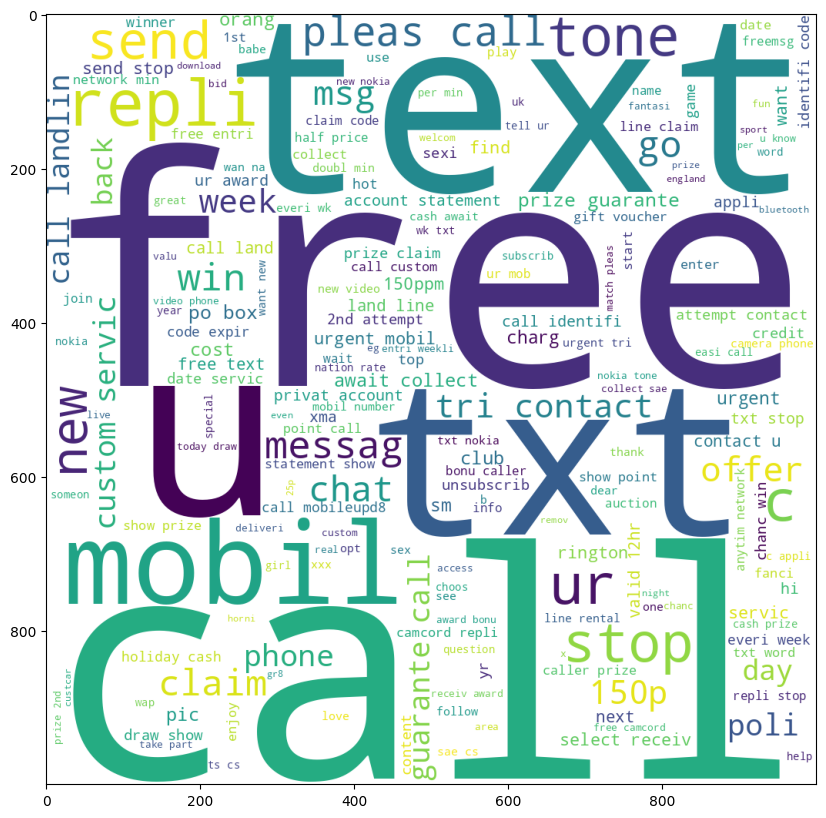

In [128]:
plt.figure(figsize = (15,10))
plt.imshow(spam_wc)

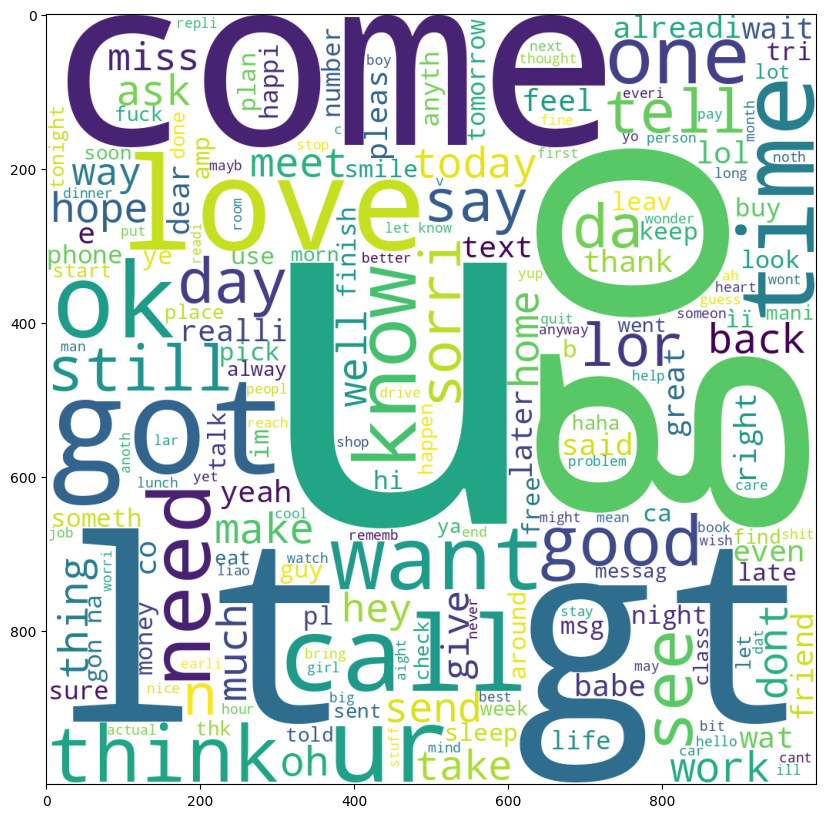

In [129]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,10))
plt.imshow(spam_wc)

In [130]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [135]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
  # print(msg)
  for words in msg.split():
    spam_corpus.append(words)

In [156]:
len(spam_corpus)

9939

<ipython-input-157-4c6b962d240c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 0, y = 1, data = df_data, palette="Set2")


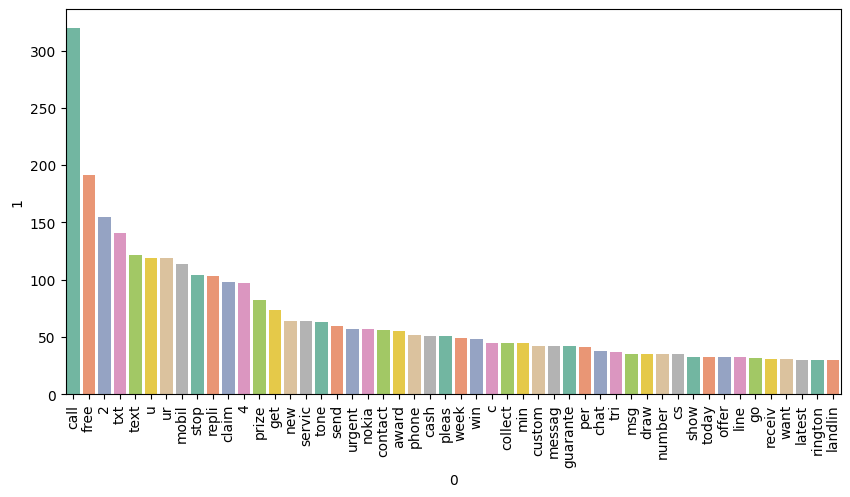

In [157]:
from collections import Counter
df_data = pd.DataFrame(Counter(spam_corpus).most_common(50))
plt.figure(figsize = (10,5))
sns.barplot(x = 0, y = 1, data = df_data, palette="Set2")
plt.xticks(rotation = 'vertical')
plt.show()

<ipython-input-159-4b6bba563a23>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 0, y = 1, data = df_data_1, palette="Set2")


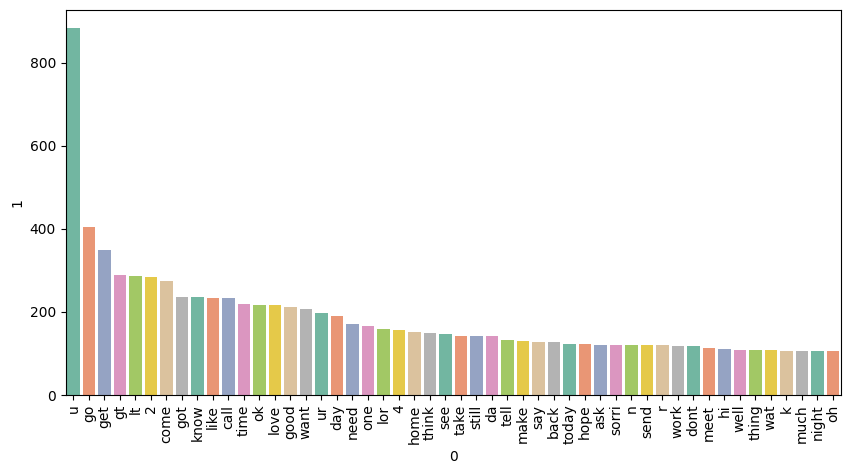

In [159]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
  # print(msg)
  for words in msg.split():
    ham_corpus.append(words)
len(spam_corpus)
from collections import Counter
df_data_1 = pd.DataFrame(Counter(ham_corpus).most_common(50))
plt.figure(figsize = (10,5))
sns.barplot(x = 0, y = 1, data = df_data_1, palette="Set2")
plt.xticks(rotation = 'vertical')
plt.show()

## **Model Building**

In [194]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [195]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [196]:
X.shape

(5169, 3000)

In [197]:
y = df['Target'].values

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [199]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [200]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [201]:
gnb.fit(X_train,y_train)
y_pred_1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_1))
print(confusion_matrix(y_test,y_pred_1))
print(precision_score(y_test,y_pred_1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [202]:
mnb.fit(X_train,y_train)
y_pred_2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))
print(precision_score(y_test,y_pred_2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [203]:
bnb.fit(X_train,y_train)
y_pred_3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_3))
print(confusion_matrix(y_test,y_pred_3))
print(precision_score(y_test,y_pred_3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [204]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))